In [2]:
# Import Libraries
import os
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_skills','job_title_short']).size()
#Convert to DataFrame insted of Series
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [13]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

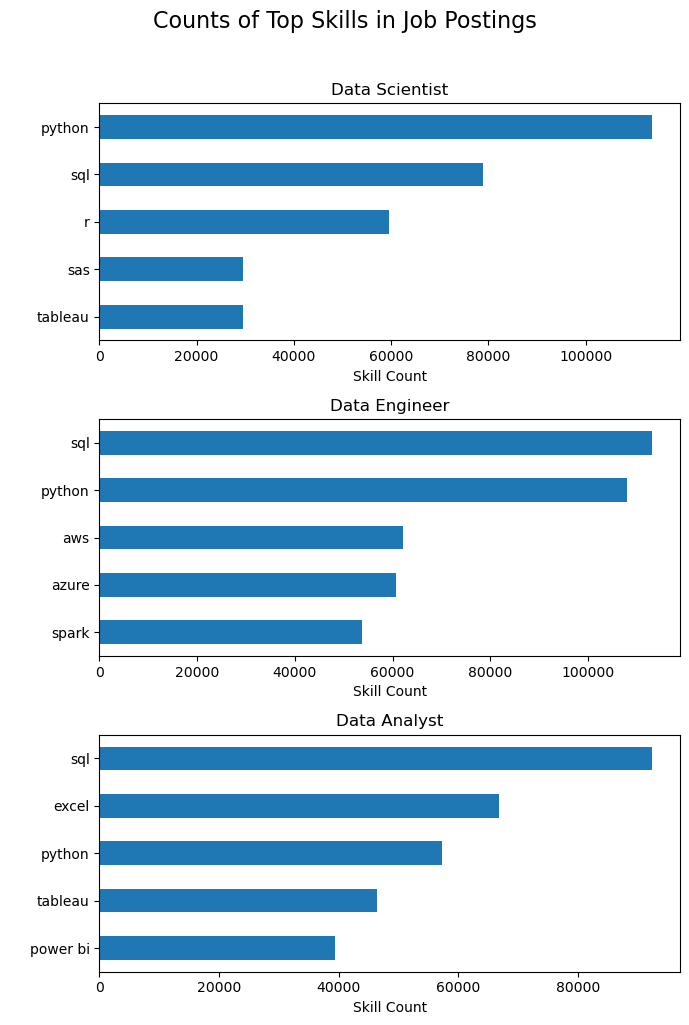

In [40]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)

    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False, title=job_title, figsize=(7, 10))
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    # ax[i].set_xlim(0, 12000)# This line can be uncommented to set a fixed x-axis limit
    ax[i].set_xlabel('Skill Count')


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=16, y=1.02)
fig.tight_layout()
plt.show()
